We first do the imports and load data similar to the tutorial. We don't retrieve the files from the Internet, assuming that it was already done, so if the loading fails, run the ImagesAndAudio.ipynb notebook first.

In [ ]:
#This pylab inline may be needed to make figures visible in Jupyter, depending on your Anaconda installation
%pylab inline
#Data manipulation
import numpy as np
#Plotting and image reading
import matplotlib.pyplot as pp
#File access
import os
import urllib.request
#Gaussian blur operation, can be used for both audio and images
from scipy.ndimage import gaussian_filter
#Audio loading
from scipy.io import wavfile
#audio playback
from IPython.display import Audio


In [2]:
image=pp.imread("temp/image.png")
samplerate,sound=wavfile.read("temp/breakbeat.wav")

## Exercise 1: Making the audio fade in

First, let's create the sweep and reshape it so that it can be broadcasted when combined with the sound

In [3]:
sweep=np.linspace(0,1,sound.shape[0])
print("Sweep shape",sweep.shape)
sweep=np.reshape(sweep,[-1,1])
print("Sweep new shape",sweep.shape)
print("Sound shape",sound.shape)

Sweep shape (392064,)
Sweep new shape (392064, 1)
Sound shape (392064, 2)


Now we can multiply the arrays and listen to the result

In [4]:
faded=sound*sweep
Audio(faded.T,rate=samplerate)

## Exercise 2: Ring modulation

Ring modulation means multiplying the sound with a sine wave. Numpy has all the common math functions including np.sin(), and they work just as well for arrays as for single values. To create a wave, we use np.sin(sweep).

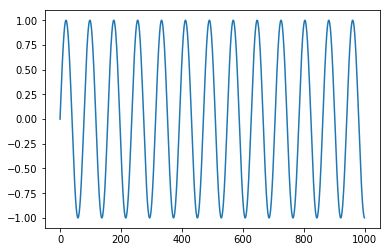

In [10]:
repetitions=5000  #we want the sine wave to repeat this many times during the sound
sweep=np.linspace(0,repetitions*2.0*np.pi,sound.shape[0])
sweep=np.reshape(sweep,[-1,1])
modulator=np.sin(sweep)
pp.plot(modulator[:1000])
modulated=modulator*sound
Audio(modulated.T,rate=samplerate)

Finally, here's how to modify the code to specify the modulator wave frequency in Hz

In [15]:
frequency=1000 
soundLengthSamples=sound.shape[0]
soundLengthSeconds=soundLengthSamples/samplerate
phaseAtTheEnd=frequency*soundLengthSeconds*2.0*np.pi
sweep=np.linspace(0,phaseAtTheEnd,soundLengthSamples)
sweep=np.reshape(sweep,[-1,1])
modulator=np.sin(sweep)
modulated=modulator*sound
Audio(modulated.T,rate=samplerate)